In [ ]:
 !pip install keras

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_test.shape

(10000,)

In [ ]:
X_test.shape

(10000, 28, 28)

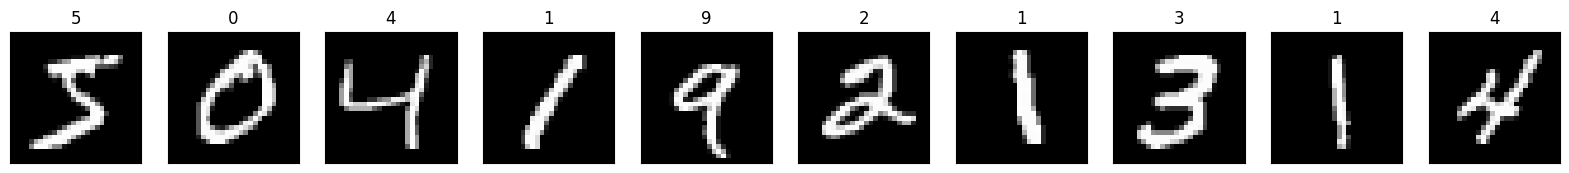

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))  # Fixed typo in 'figsize'

for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')  # Changed 'cmap' to 'gray'
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


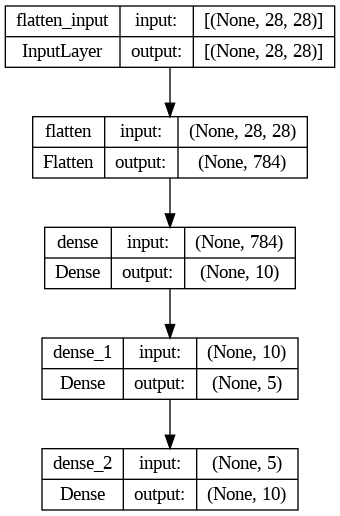

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.7588 - acc: 0.4568 - val_loss: 1.3416 - val_acc: 0.6391
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1640 - acc: 0.6821 - val_loss: 1.0382 - val_acc: 0.7015
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.9606 - acc: 0.7102 - val_loss: 0.9136 - val_acc: 0.7133
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8795 - acc: 0.7164 - val_loss: 0.8458 - val_acc: 0.7342
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8115 - acc: 0.7418 - val_loss: 0.8049 - val_acc: 0.7358
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7962 - acc: 0.7403 - val_loss: 0.8034 - val_acc: 0.7536
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7265 - acc: 0.7744 - val_loss: 0.7192 - val_acc: 0.7854
Epoch 8/20
1875/1875 [==============================] - 9s 5ms

In [ ]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history.history

{'loss': [1.7587867975234985,
  1.1640400886535645,
  0.9606075286865234,
  0.8795130848884583,
  0.8114855885505676,
  0.796191394329071,
  0.7265304327011108,
  0.7189716696739197,
  0.6737161874771118,
  0.6457077860832214,
  0.6438093781471252,
  0.6246327757835388,
  0.6136595606803894,
  0.5930658578872681,
  0.581805944442749,
  0.564540684223175,
  0.5635943412780762,
  0.5632734298706055,
  0.5648432374000549,
  0.5554036498069763],
 'acc': [0.4567500054836273,
  0.6821333169937134,
  0.710183322429657,
  0.7163500189781189,
  0.7417833209037781,
  0.7403166890144348,
  0.7743833065032959,
  0.7733166813850403,
  0.7954666614532471,
  0.8089166879653931,
  0.8082166910171509,
  0.8145166635513306,
  0.8172833323478699,
  0.8295333385467529,
  0.8316500186920166,
  0.834850013256073,
  0.8400166630744934,
  0.8372666835784912,
  0.836483359336853,
  0.839983344078064],
 'val_loss': [1.3415778875350952,
  1.038213849067688,
  0.9135832786560059,
  0.8458177447319031,
  0.8049482

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

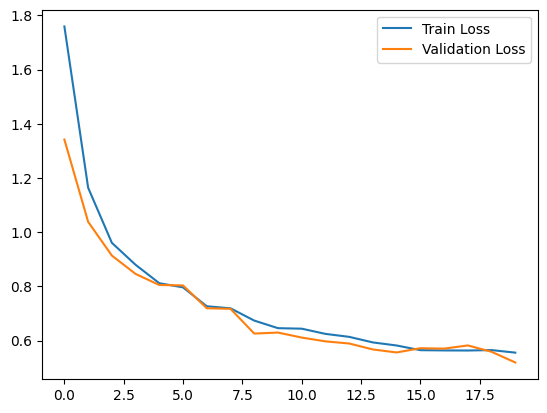

In [ ]:
# Plot the training and validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

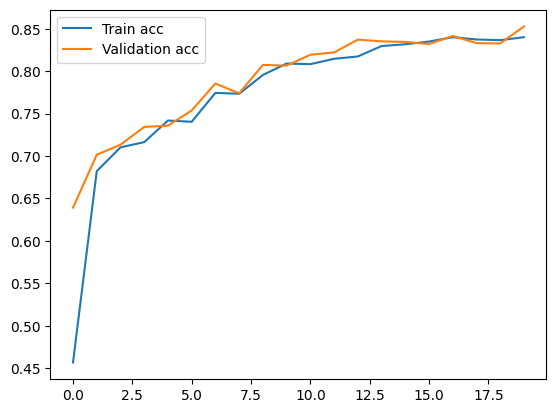

In [ ]:
plt.plot(history.history['acc'], label='Train acc')  # Accessing train accuracy
plt.plot(history.history['val_acc'], label='Validation acc')  # Accessing validation accuracy
plt.legend()

In [ ]:
import keras
model = keras.models.load_model('mnist_model.h5')

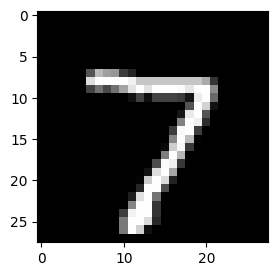

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))  # Set the figure size
plt.imshow(X_test[0], cmap='gray')
plt.show()


In [ ]:
import numpy as np
X = np.reshape(X_test[0],(1, 28, 28))
np.argmax(model.predict(X))

1/1 [==============================] - 0s 90ms/step


7

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 20ms/step


array([[5.1451119e-05, 2.7365188e-04, 1.5229902e-04, 6.6597685e-03,
        9.2394341e-04, 2.4310036e-03, 1.4055908e-07, 9.4271171e-01,
        1.3627788e-03, 4.5433220e-02]], dtype=float32)